# Image Dataset Example


x.shape: torch.Size([3, 300, 300])


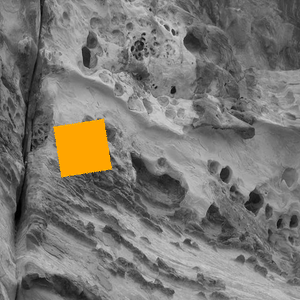

y_label: 3
context: ['fg_shape', 'bg_label', 'fg_color', 'ground_truth_attribute']


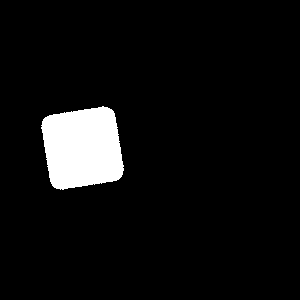

In [10]:
from xaiunits.datagenerator.image_generation import BalancedImageDataset, ImbalancedImageDataset

data = BalancedImageDataset(
    seed=0,
    backgrounds=5,
    shapes=10,
    n_variants=4,
    background_size=(300, 300),
    shape_type="geometric",
    position="random",
    overlay_scale=0.3,
    rotation=True,
    shape_colors=["orange"],
    contour_thickness=20,
)

def jupyter_display(img_tensor):
    from torchvision import transforms
    from IPython.display import display
    display(transforms.ToPILImage()(img_tensor).convert("RGB"))

# Examining one datapoint from the dataset
x, y_label, context = data[0]

# x is an image tensor
print("x.shape:", x.shape)
jupyter_display(x)

# y is an integer label representing the foreground shape
print("y_label:", y_label)

# context is a dict that contains "ground_truth_attribute"
print("context:", list(context.keys()))
jupyter_display(context["ground_truth_attribute"])

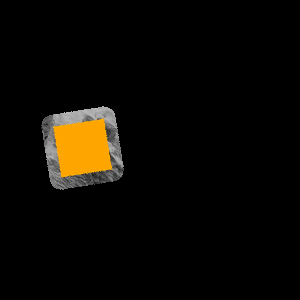

In [11]:
# Note that the ground truth mask contains both the foreground shape and a small border around the shape
# (In order to capture CNN's triggering on the edge of the shape)
# The width of this border is set by the contour_thickness parameter when you define the dataset
jupyter_display(context["ground_truth_attribute"] * x)

First foreground shape


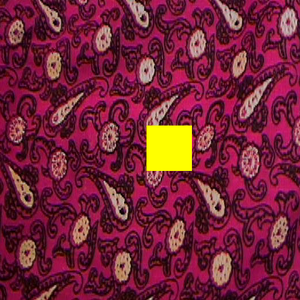

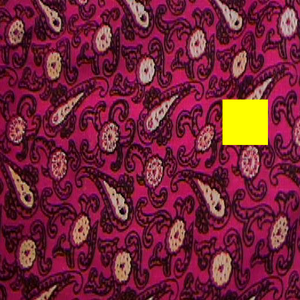

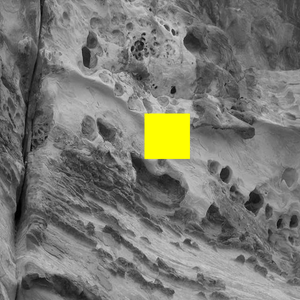

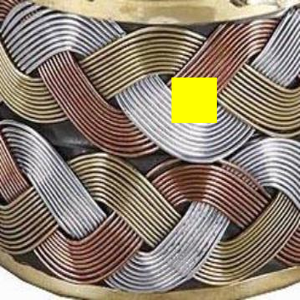

In [12]:
# The imbalanced dataset has an extra parameter for imbalance
# This dataset also requires shapes>=2, and backgrounds>=shapes
imbalanced_data = ImbalancedImageDataset(
        backgrounds=3,
        shapes=2,
        n_variants=4,
        shape_colors="yellow",
        background_size=(300, 300),
        imbalance=0.5,
        shuffled=False
)

# Here we have selected an imbalance of 0.5 and n_variants=4
# So for any given foreground shape, 2 images will be associated with one background
# And for that foreground shape, the remaining 2 images will be spread across the other backgrounds
print("First foreground shape")
jupyter_display(imbalanced_data[0][0])
jupyter_display(imbalanced_data[1][0])
jupyter_display(imbalanced_data[2][0])
jupyter_display(imbalanced_data[3][0])

Second foreground shape


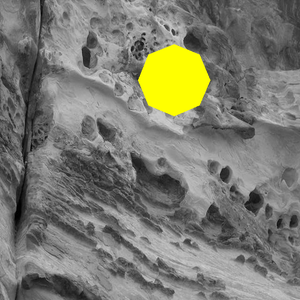

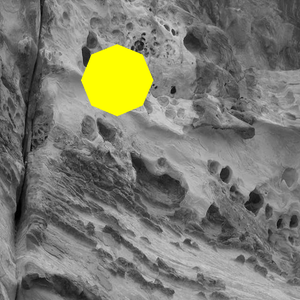

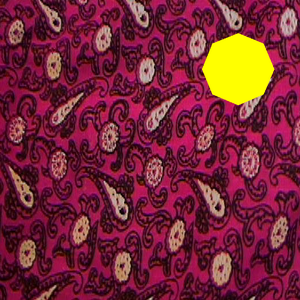

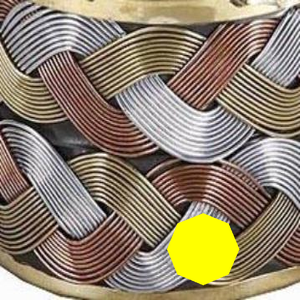

In [13]:
print("Second foreground shape") # since shapes=2, n_variants=4
jupyter_display(imbalanced_data[4][0])
jupyter_display(imbalanced_data[5][0])
jupyter_display(imbalanced_data[6][0])
jupyter_display(imbalanced_data[7][0])